In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
boston = datasets.load_boston()

In [4]:
print(boston.keys())
print(boston.DESCR)
print(boston.data.shape)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [5]:
x = boston.data[:, np.newaxis, 5]
print(x.shape)

(506, 1)


In [6]:
y = boston.target
print(y.shape)

(506,)


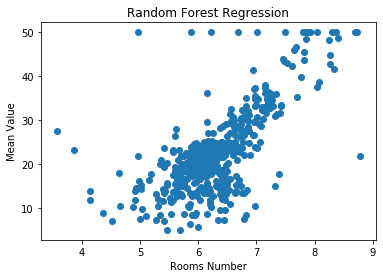

In [8]:
plt.scatter(x, y)
plt.title('Random Forest Regression')
plt.xlabel('Rooms Number')
plt.ylabel('Mean Value')
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 1)
(404,)
(102, 1)
(102,)


In [24]:
alg = RandomForestRegressor(n_estimators=300, max_depth=5)
alg.fit(x_train, y_train)
y_pred = alg.predict(x_test)
print(y_pred.shape)

(102,)


In [25]:
x_grid = np.arange(min(x_test), max(x_test), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
y_grid = alg.predict(x_grid)

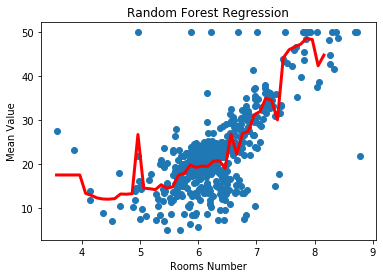

In [26]:
plt.scatter(x, y)
plt.plot(x_grid, y_grid, color='red', linewidth=3)
plt.title('Random Forest Regression')
plt.xlabel('Rooms Number')
plt.ylabel('Mean Value')
plt.show()

In [28]:
print('certainty:', alg.score(x_train, y_train) * 100, '%')

certainty: 73.1630263113436 %
